In [1]:
import pandas as pd
import datetime as dt
import numpy as np
from snowflake.connector.pandas_tools import write_pandas
import snowflake.connector
import os



In [2]:
#!pip install pycausalimpact
from causalimpact import CausalImpact


In [5]:
# Import the function from your external script
from IOS_query import run_snowflake_query

# Run the query and get the results as a DataFrame
ios_df = run_snowflake_query()

# Display the DataFrame
ios_df.head()

Initiating login request with your identity provider. A browser window should have opened for you to complete the login. If you can't see it, check existing browser windows, or your OS settings. Press CTRL+C to abort and try again...
Going to open: https://justworks.cloudflareaccess.com/cdn-cgi/access/sso/saml/d74bc06bca5abf66677a16a11e6235e70f0ac75f0e462ccdea97b5bcb5cab993?SAMLRequest=lZNfb9owFMW%2FSuQ9J7YDBLCAiha1ZWtXVmAPe3NsJ%2FVIbObrNO23r8MfqdPUSnuLbs7179x77MnFS11Fz8qBtmaKaEJQpIywUptyirab63iEIvDcSF5Zo6boVQG6mE2A19WezRv%2FZB7Vn0aBj8JBBlj3Y4oaZ5jloIEZXitgXrD1%2FP6OpQlhHEA5H3Do1CJBB9aT93uGcdu2SdtLrCtxSgjBZIyDqpN8Qe8Q%2B88Ze2e9FbY6t7yEmT5AUEz6HSIoAmF1arzU5riCzyj5UQTsdrNZxauH9QZF8%2FN0V9ZAUyu3Vu5ZC7V9vDsagODgdwO%2BtW4Hcc21ScDYtqj4Tglb7xsfjkzCFy6UxJUtdVjUcjFF%2B52WcMvvb9bC1KJXtptLsih578dNmZZGtl%2BLkXhYf6P5Lc%2FsditQ9PMca9rFugRo1NJ0YfpQImk%2FpjRO6YaOWJ%2BwwSgZ094vFC1CmNpwf%2Bj8x3EiKtvI4NYpLoQCOFgV0sSi1PhYwgAWdylhOezngmS54AOeF1mWDYecZpxSlaW9gRqSgnAxHBRE9bNUCKn4eJgPcpEPBM%2FH4x463jR28O5m%2F

/Users/lmola/Documents/Luis_Projects/OOH/IOS_query.py:185: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(io_query, conn)


,IOS,ACCOUNT_ID,ID_FRM_ACCTS,BILLINGCITY,BILLINGSTATE,BILLINGCOUNTRY,BILLINGZIP,IO_YYYYQQ,IO_WEEK_OF_QTR,IO_QUARTER,...,INBOUND_EXCLUSION_FLAG,OWNER,OPPORTUNITY_ID,QL_REFERRER_NAME,QL_REFERRER_ROLE,QL_SOURCED_BY_NAME,QL_SOURCED_BY_ROLE,OPPORTUNITY_SOURCED_BY_NAME,OPPORTUNITY_SOURCED_BY_ROLE,DEMAND_CHANNEL
0,0066S00000zM5TqQAK,001PJ00000AAY2hYAH,001PJ00000AAY2hYAH,SCOTTSDALE,AZ,USA,85251,20224,2022-03-07,4,...,Include,Self Service,None,None,None,None,None,None,None,None
1,006PJ00000BLbZJYA1,001PJ00000Bh2Q2YAJ,001PJ00000Bh2Q2YAJ,None,None,None,43774,20251,2024-07-15,1,...,Include,Self Service,None,None,None,None,None,None,None,None
2,0066S000013ZBRdQAO,0016S00003BJcoXQAT,0016S00003BJcoXQAT,None,None,None,11205,20232,2022-08-29,2,...,Include,Self Service,None,None,None,None,None,None,None,None
3,0066S000015aKp8QAE,0016S00003NQUBEQA5,0016S00003NQUBEQA5,New York,New York,United States,10005,20241,2023-06-26,1,...,Include,Self Service,None,None,None,None,None,None,None,None
4,006PJ000007hlkPYAQ,001PJ000007o0wrYAA,001PJ000007o0wrYAA,Portland,OR,United States,97225,20244,2024-03-04,4,...,Include,MRA,None,None,None,None,None,None,None,None


In [6]:
# Import the function from your external script
from district_map_query import map_query

# Run the query and get the results as a DataFrame
map_df = map_query()
map_df = map_df[['ZIP_CODE__C', 'STATE__C', 'STATE_ABBREVIATION__C', 'MSA_MARKET_PRIMARY__C', 'MSA_NUMBER__C', 'MARKETING_DISTRICT__C']]

# Display the DataFram

Initiating login request with your identity provider. A browser window should have opened for you to complete the login. If you can't see it, check existing browser windows, or your OS settings. Press CTRL+C to abort and try again...
Going to open: https://justworks.cloudflareaccess.com/cdn-cgi/access/sso/saml/d74bc06bca5abf66677a16a11e6235e70f0ac75f0e462ccdea97b5bcb5cab993?SAMLRequest=lZNdb9owFIb%2FSuRdJ7YDJMUqVKy0K%2BvHGIRO2p1jG3BJbOrjNO2%2Fn%2FmSOk2ttLvo5D1%2B3nNe%2B%2Fzita6iF%2BVAWzNANCEoUkZYqc1qgBbFdXyGIvDcSF5ZowboTQG6GJ4Dr6stGzV%2BbWbquVHgo3CQAbb7MUCNM8xy0MAMrxUwL9h8dH%2FH0oQwDqCcDzh0bJGgA2vt%2FZZh3LZt0nYS61Y4JYRg0sdBtZN8Qe8Q288ZW2e9FbY6tbyGmT5AUEy6O0RQBML02PhVm8MKPqOUBxGwm6KYxtMf8wJFo9N0l9ZAUys3V%2B5FC7WY3R0MQHDw1IBvrdtAXHNtEjC2XVZ8o4Stt40PRybhCy%2BVxJVd6bCoyXiAthst%2Bfr78%2FysX8DtqF1c3f%2BiDx2zmT%2F6Iv9ZTWf2SZYlp99u7sX8SqDo8RRruot1AtCoidmF6UOJpN2Y0jilBT1j3ZTRTkIJ%2BY2icQhTG%2B73nf84TkRlGxncOsWFUAB7q0KaWKw0PpQwgMW7lLDMu6UgWSl4j5fLLMvynNOMU6qytNNTOVkSLvLekqhulgohFe%2FnZa8UZU%2Fws

/Users/lmola/Documents/Luis_Projects/OOH/district_map_query.py:24: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


In [7]:
 map_df.head()

,ZIP_CODE__C,STATE__C,STATE_ABBREVIATION__C,MSA_MARKET_PRIMARY__C,MSA_NUMBER__C,MARKETING_DISTRICT__C
0,97003,Oregon,OR,"Salem, OR MSA",41420.0,sanitized_f667cee84b45028f5db8f1939e1c06b90c06...
1,21866,Maryland,MD,"Salisbury, MD MSA",41540.0,DC Metro
2,90189,California,CA,"Los Angeles-Long Beach-Santa Ana, CA MSA",31100.0,Los Angeles
3,48557,Michigan,MI,"Flint, MI MSA",22420.0,Rest of Country
4,82931,Wyoming,WY,WY NONMETROPOLITAN AREA,99048.0,Rest of Country


In [8]:
missing_geo_map = map_df.isna().mean() * 100

print("Columns in IOs_filtered with missing values:")
print(missing_geo_map)

Columns in IOs_filtered with missing values:
ZIP_CODE__C              0.0
STATE__C                 0.0
STATE_ABBREVIATION__C    0.0
MSA_MARKET_PRIMARY__C    0.0
MSA_NUMBER__C            0.0
MARKETING_DISTRICT__C    0.0
dtype: float64


In [9]:
print(len(ios_df))
print(len(map_df))

merged_df = pd.merge(ios_df, map_df, left_on='BILLINGZIP', right_on = 'ZIP_CODE__C', how='inner')



print(len(merged_df))

print(f'loss is {1-len(merged_df)/len(ios_df)}')

# Convert the column to date format with specified format
merged_df['IO_DATE'] = pd.to_datetime(merged_df['IO_DATE'], format='%Y-%m-%d')

merged_df.head()

26807
42491
25747
loss is 0.03954191069496771


,IOS,ACCOUNT_ID,ID_FRM_ACCTS,BILLINGCITY,BILLINGSTATE,BILLINGCOUNTRY,BILLINGZIP,IO_YYYYQQ,IO_WEEK_OF_QTR,IO_QUARTER,...,QL_SOURCED_BY_ROLE,OPPORTUNITY_SOURCED_BY_NAME,OPPORTUNITY_SOURCED_BY_ROLE,DEMAND_CHANNEL,ZIP_CODE__C,STATE__C,STATE_ABBREVIATION__C,MSA_MARKET_PRIMARY__C,MSA_NUMBER__C,MARKETING_DISTRICT__C
0,0066S00000zM5TqQAK,001PJ00000AAY2hYAH,001PJ00000AAY2hYAH,SCOTTSDALE,AZ,USA,85251,20224,2022-03-07,4,...,None,None,None,None,85251,Arizona,AZ,"Phoenix-Mesa-Scottsdale, AZ MSA",38060.0,Phoenix
1,0066S000013ZBRdQAO,0016S00003BJcoXQAT,0016S00003BJcoXQAT,None,None,None,11205,20232,2022-08-29,2,...,None,None,None,None,11205,New York,NY,"New York-Northern New Jersey-Long Island, NY-N...",35620.0,New York Metro
2,0066S000015aKp8QAE,0016S00003NQUBEQA5,0016S00003NQUBEQA5,New York,New York,United States,10005,20241,2023-06-26,1,...,None,None,None,None,10005,New York,NY,"New York-Northern New Jersey-Long Island, NY-N...",35620.0,New York Metro
3,006PJ000007hlkPYAQ,001PJ000007o0wrYAA,001PJ000007o0wrYAA,Portland,OR,United States,97225,20244,2024-03-04,4,...,None,None,None,None,97225,Oregon,OR,"Portland-Vancouver-Beaverton, OR-WA MSA",38900.0,Rest of Country
4,006PJ000008NlpdYAC,001PJ000008awdZYAQ,001PJ000008awdZYAQ,ST PETERSBURG,FL,None,33702,20244,2024-03-25,4,...,None,None,None,None,33702,Florida,FL,"Tampa-St. Petersburg-Clearwater, FL",45300.0,Rest of Florida


In [10]:
# Add a 'year_month' column to group by month
merged_df["year_month"] = merged_df["IO_DATE"].dt.to_period("M")

# Aggregate by month, with multiple aggregations
monthly_aggregated = (
    merged_df.groupby(
        ["year_month", "STATE__C", "STATE_ABBREVIATION__C", "MSA_MARKET_PRIMARY__C"]
    )
    .agg(
        io_count=("IOS", "nunique"),  # Count rows per month
    )
    .reset_index()
)

In [11]:
monthly_aggregated.head()

,year_month,STATE__C,STATE_ABBREVIATION__C,MSA_MARKET_PRIMARY__C,io_count
0,2021-06,Alabama,AL,AL NONMETROPOLITAN AREA,1
1,2021-06,Alabama,AL,"Huntsville, AL MSA",2
2,2021-06,Alabama,AL,"Montgomery, AL MSA",1
3,2021-06,Alaska,AK,"Anchorage, AK MSA",2
4,2021-06,Arizona,AZ,"Phoenix-Mesa-Scottsdale, AZ MSA",8


In [77]:
#Define Parameters


MSA_MARKET = "New York"
#STATE = "New York"
BRAND_MSA = "New York, NY"

BRAND_MSA_list = ["Austin, TX", "Denver, CO", "Los Angeles, CA", "Miami-Ft. Lauderdale, FL", 
                  "New York, NY", "San Francisco-Oakland-San Jose, CA"]

# Used as contains filter 
MSA_MARKET_list = ["Austin", "Denver", "Los Angeles", "Miami", "New York", "San Francisco"]

# Used as equals filter
city_to_state = {
    "Austin": "Texas",
    "Denver": "Colorado",
    "Los Angeles": "California",
    "Miami": "Florida",
    "New York": "New York",
    "San Francisco": "California"
    
}

STATE = city_to_state[MSA_MARKET]

print('the state is ' + STATE)

#intervention_date = '2024-08-01'

campaign_start_dict = {'Austin, TX': '2024-09-09', 'Denver, CO': '2024-08-19', \
    'Los Angeles, CA': '2024-09-02', 'Miami-Ft. Lauderdale, FL': '2024-08-26',\
    'New York, NY': '2024-08-26', 'San Francisco-Oakland-San Jose, CA': '2024-09-02',\
    'Queens_New York': '2024-08-26', 'Brooklyn_New York': '2024-08-26',\
    'The Bronx_New York': '2024-08-26', 'Jersey City_New Jersey': '2024-08-26',\
    'Newark_New Jersey': '2024-08-26', 'San Jose_California': '2024-09-02'
    }


# Convert to datetime and round to the start of the month
month_start = pd.to_datetime(campaign_start_dict[BRAND_MSA]).to_period('M').to_timestamp()

# Convert back to string in yyyy-mm-dd format
intervention_date = month_start.strftime('%Y-%m-%d')

print(intervention_date)
#date_start = campaign_start_dict[treatment_city_region]


the state is New York
2024-08-01


In [78]:
city_monthly_data = monthly_aggregated[
    monthly_aggregated["MSA_MARKET_PRIMARY__C"].str.contains(MSA_MARKET, case=False)
    & (monthly_aggregated["STATE__C"] == STATE)
    #& (monthly_aggregated["year_month"] >= '2022')
].sort_values(by="year_month", ascending=True)

city_monthly_data.head(5)

,year_month,STATE__C,STATE_ABBREVIATION__C,MSA_MARKET_PRIMARY__C,io_count
81,2021-06,New York,NY,"New York-Northern New Jersey-Long Island, NY-N...",147
220,2021-07,New York,NY,"New York-Northern New Jersey-Long Island, NY-N...",111
333,2021-08,New York,NY,"New York-Northern New Jersey-Long Island, NY-N...",109
454,2021-09,New York,NY,"New York-Northern New Jersey-Long Island, NY-N...",106
578,2021-10,New York,NY,"New York-Northern New Jersey-Long Island, NY-N...",139


In [79]:
city_monthly_data["year_month"] = city_monthly_data["year_month"].dt.to_timestamp()
# city_monthly_data.head()


# city_monthly_data["year_month"] = pd.to_datetime(
#     city_monthly_data["year_month"]
# ).dt.strftime("%Y-%m-%d")

marketing_pre_period = city_monthly_data[
    city_monthly_data["year_month"] < "2024-08-01"
][["year_month", "io_count"]]

marketing_post_period = city_monthly_data[
    (city_monthly_data["year_month"]
    >= "2024-08-01") & (city_monthly_data["year_month"]
    < "2024-11-01")
][["year_month", "io_count"]]

marketing_pre_period.head()

# ['2010-02-05','2012-06-29']


# marketing_post_period.head()

,year_month,io_count
81,2021-06-01,147
220,2021-07-01,111
333,2021-08-01,109
454,2021-09-01,106
578,2021-10-01,139


In [80]:
df_final = city_monthly_data[['year_month', 'io_count']]
# Convert the date column to datetime (if it's not already)
df_final['year_month'] = pd.to_datetime(df_final['year_month'])  # Adjust column name if necessary

# Set the date column as the index
df_final.set_index('year_month', inplace=True)
df_final.head()

/var/folders/sb/n8yqrs6n7y9ghs7jf_2n7h280000gp/T/ipykernel_16236/330667666.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['year_month'] = pd.to_datetime(df_final['year_month'])  # Adjust column name if necessary


,io_count
year_month,
2021-06-01,147
2021-07-01,111
2021-08-01,109
2021-09-01,106
2021-10-01,139


In [81]:
from causalimpact import CausalImpact


pre_period = ["2021-06-01", "2024-07-01"]
post_period = ["2024-08-01", "2024-10-01"]
impact = CausalImpact(df_final, pre_period, post_period, model_args={'niter': 5000}, alpha = 0.1)
print(impact.summary())

/Users/lmola/.pyenv/versions/3.11.7/lib/python3.11/site-packages/causalimpact/main.py:603: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  if not data.applymap(np.isreal).values.all():
/Users/lmola/.pyenv/versions/3.11.7/lib/python3.11/site-packages/causalimpact/main.py:302: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  self.mu_sig = (mu[0], sig[0])
/Users/lmola/.pyenv/versions/3.11.7/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/lmola/.pyenv/versions/3.11.7/lib/python3.11/site-packages/statsmodels/base/optimizer.py:19: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list 

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    140.33             421.0
Prediction (s.d.)         116.71 (9.33)      350.14 (28.0)
90% CI                    [100.24, 130.94]   [300.72, 392.82]

Absolute effect (s.d.)    23.62 (9.33)       70.86 (28.0)
90% CI                    [9.39, 40.09]      [28.18, 120.28]

Relative effect (s.d.)    20.24% (8.0%)      20.24% (8.0%)
90% CI                    [8.05%, 34.35%]    [8.05%, 34.35%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 99.6%

For more details run the command: print(impact.summary('report'))


In [82]:
print(impact.summary('report'))

Analysis report {CausalImpact}


During the post-intervention period, the response variable had
an average value of approx. 140.33. By contrast, in the absence of an
intervention, we would have expected an average response of 116.71.
The 90% interval of this counterfactual prediction is [100.24, 130.94].
Subtracting this prediction from the observed response yields
an estimate of the causal effect the intervention had on the
response variable. This effect is 23.62 with a 90% interval of
[9.39, 40.09]. For a discussion of the significance of this effect,
see below.


Summing up the individual data points during the post-intervention
period (which can only sometimes be meaningfully interpreted), the
response variable had an overall value of 421.0.
By contrast, had the intervention not taken place, we would have expected
a sum of 350.14. The 90% interval of this prediction is [300.72, 392.82].


The above results are given in terms of absolute numbers. In relative
terms, the response vari

/Users/lmola/.pyenv/versions/3.11.7/lib/python3.11/site-packages/causalimpact/main.py:603: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  if not data.applymap(np.isreal).values.all():
/Users/lmola/.pyenv/versions/3.11.7/lib/python3.11/site-packages/causalimpact/main.py:302: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  self.mu_sig = (mu[0], sig[0])
/Users/lmola/.pyenv/versions/3.11.7/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/lmola/.pyenv/versions/3.11.7/lib/python3.11/site-packages/statsmodels/base/optimizer.py:19: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list 

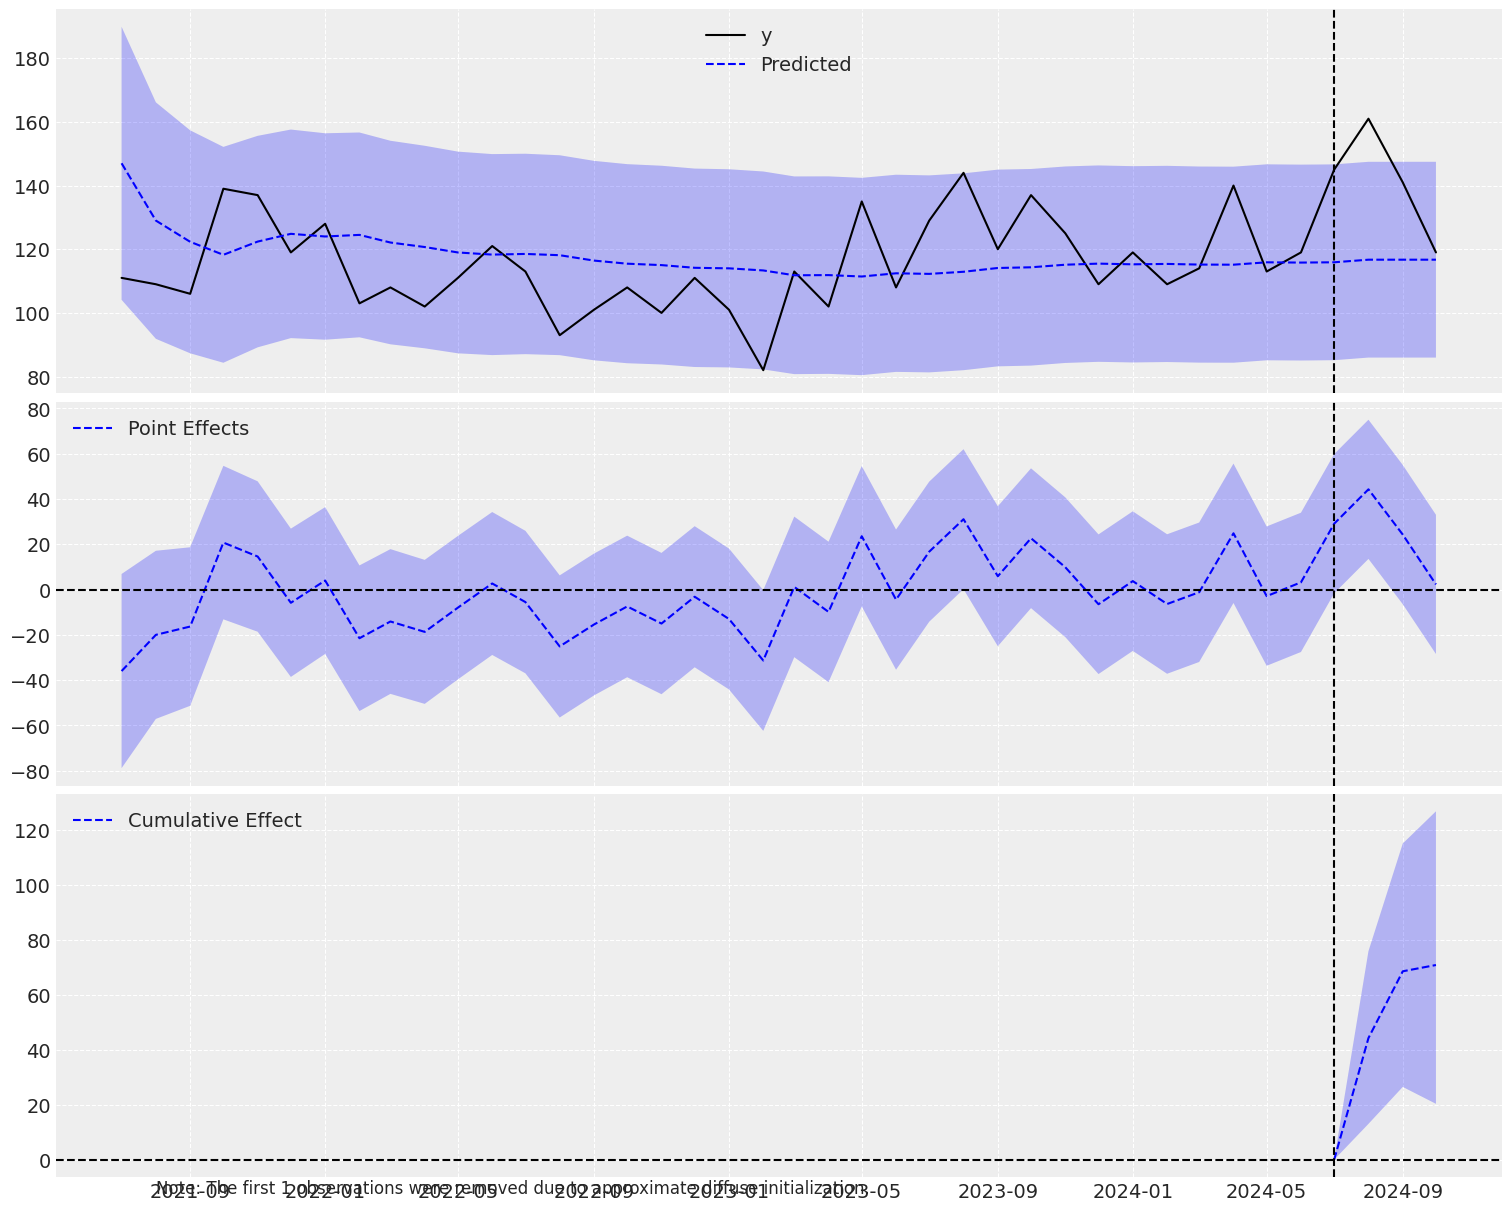

In [83]:
ci = CausalImpact(df_final, pre_period, post_period)

ci.plot()

In [84]:

import causalpy as cp


In [85]:
type(marketing_post_period)

pandas.core.frame.DataFrame

In [86]:
# Combine data
#intervention_date = '2024-08-01'
data = pd.concat([marketing_pre_period, marketing_post_period])
data["intervention"] = data["year_month"] >= pd.to_datetime(intervention_date)
data["t"]=range(len(data))
data['month'] = data['year_month'].dt.month

data_final = data.set_index('year_month')


In [87]:
data.head()

,year_month,io_count,intervention,t,month
81,2021-06-01,147,False,0,6
220,2021-07-01,111,False,1,7
333,2021-08-01,109,False,2,8
454,2021-09-01,106,False,3,9
578,2021-10-01,139,False,4,10


In [88]:
data_final.head()

,io_count,intervention,t,month
year_month,,,,
2021-06-01,147,False,0,6
2021-07-01,111,False,1,7
2021-08-01,109,False,2,8
2021-09-01,106,False,3,9
2021-10-01,139,False,4,10


In [89]:
data_final.tail()

,io_count,intervention,t,month
year_month,,,,
2024-06-01,119,False,36,6
2024-07-01,145,False,37,7
2024-08-01,161,True,38,8
2024-09-01,141,True,39,9
2024-10-01,119,True,40,10


In [90]:
print(dir(cp.pymc_models))

['Any', 'Dict', 'InstrumentalVariableRegression', 'LinearRegression', 'Optional', 'PropensityScore', 'PyMCModel', 'WeightedSumFitter', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', 'az', 'np', 'pd', 'pm', 'pt', 'r2_score', 'round_num', 'xr']


In [91]:
data_final.isna().sum()

io_count        0
intervention    0
t               0
month           0
dtype: int64

In [92]:
data_final.head()


,io_count,intervention,t,month
year_month,,,,
2021-06-01,147,False,0,6
2021-07-01,111,False,1,7
2021-08-01,109,False,2,8
2021-09-01,106,False,3,9
2021-10-01,139,False,4,10


In [93]:
data_final.tail()

,io_count,intervention,t,month
year_month,,,,
2024-06-01,119,False,36,6
2024-07-01,145,False,37,7
2024-08-01,161,True,38,8
2024-09-01,141,True,39,9
2024-10-01,119,True,40,10


In [94]:
# Import the function from your external script
from direct_search_query import run_direct_search_query

# Run the query and get the results as a DataFrame
#direct_search_df = run_direct_search_query('New York', 'New York')
direct_search_df = run_direct_search_query(MSA_MARKET, STATE)

# Display the DataFrame
direct_search_df.head()

Initiating login request with your identity provider. A browser window should have opened for you to complete the login. If you can't see it, check existing browser windows, or your OS settings. Press CTRL+C to abort and try again...
Going to open: https://justworks.cloudflareaccess.com/cdn-cgi/access/sso/saml/d74bc06bca5abf66677a16a11e6235e70f0ac75f0e462ccdea97b5bcb5cab993?SAMLRequest=lZNfb9owFMW%2FSuQ9J3YS8gcLqBgMjanbGIFp7ZvjGHBJbObrkPLtZ6BInaZW2pt1fY79u%2FfYg7vnpvaOwoDUaojCgCBPKK4rqbZDtF7N%2FBx5YJmqWK2VGKKTAHQ3GgBr6gMdt3anluJ3K8B67iAF9LIxRK1RVDOQQBVrBFDLaTH%2Bek%2BjgNCD0VZzXaNXlvcdDEAY6whvlgqkw9tZe6AYd10XdHGgzRZHhBBM%2BtipzpIPN%2F2z6%2BkNfYhJ76x3CidfvLB9lOo6gvewyqsI6OfVauEvvhcr5I1vqBOtoG2EKYQ5Si7Wy%2FsrADiCpxZsp80e%2FIZJFYDS3aZme8F1c2itOzJwK7wRFa71Vrqu59MhOuxltSuadXyCfM8eHvNE%2F3iCTw8sLkSmj1%2Bm%2BSRaHorp4tds0e1yjryft1ijc6xzgFbM1TlM60ok6vlh6EfhKsxpklMSB2nce0Te1IUpFbMX5z%2FEAa91WzlaIxjnAuCCyivl863E1xIG0PicKq6yXslJWnKWsHKTpmmWsTBlYSjSKE5ERjaE8SzZENFLI84rwfpZmZS8TDgr%2B%2F0YXV8avbCb0X%

/Users/lmola/Documents/Luis_Projects/OOH/direct_search_query.py:31: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(direct_query, conn)


,CITY,REGION,COUNTRY,MARKETING_CHANNEL,MONTH_START,MONTHLY_SUM
1,New York,New York,United States,Direct,2022-02-01,2
2550,New York,New York,United States,Direct,2022-03-01,3264
4841,New York,New York,United States,Direct,2022-04-01,2716
7571,New York,New York,United States,Direct,2022-05-01,2290
10015,New York,New York,United States,Direct,2022-06-01,3770


In [95]:
# Import the function from your external script
from brand_search_query import run_brand_search_query

# Run the query and get the results as a DataFrame
print(MSA_MARKET)
print(STATE)
print(BRAND_MSA)

brand_search_df = run_brand_search_query(BRAND_MSA, MSA_MARKET)


# Display the DataFrame
brand_search_df.head()

New York
New York
New York, NY
Initiating login request with your identity provider. A browser window should have opened for you to complete the login. If you can't see it, check existing browser windows, or your OS settings. Press CTRL+C to abort and try again...
Going to open: https://justworks.cloudflareaccess.com/cdn-cgi/access/sso/saml/d74bc06bca5abf66677a16a11e6235e70f0ac75f0e462ccdea97b5bcb5cab993?SAMLRequest=lZNfb9owFMW%2FSuQ9J44DCWABFQNVQ2oH5c%2B08ebYTuri2Mx2GuinnyEgdZpaaW%2FRzbn%2BnXuPPbw7VjJ45cYKrUYARTEIuKKaCVWOwHZzH%2FZBYB1RjEit%2BAicuAV346EllTzgSe2e1Yr%2Frrl1gT9IWXz%2BMQK1UVgTKyxWpOIWO4rXk8cHnEQxJtZy4zwOXFuYFZ717NwBQ9g0TdR0Im1KmMRxDOMB9Kqz5At4hzh8zjgY7TTV8tZy9DN9gEAw7p4RXuEJy2vjV6HaFXxGyVuRxd82m2W4XKw3IJjcpptqZeuKmzU3r4Ly7eqhNWC9g5faukabvQ0rIlRklW4KSfac6upQO39k5L9gwRmUuhR%2BUfPZCBz2gsn%2Br6cyedwW3XK1P1VPL8vFcVeR9SpZ9X8ud%2BhNDsh2z8Riuqcg%2BHGLNTnHOre25nN1DtP5Upx0Q4TCBG1QH6d9jJIIpdkOBDMfplDEXTr%2FcRxRqWvm3RpOKOXWXqxSpkJaCtiWoLUanlOCrNfNaZzllKQkL7Is6%2FUIyghCPEs6Ke%2FFRUxoLy

/Users/lmola/Documents/Luis_Projects/OOH/brand_search_query.py:70: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(brand_query, conn)


,STATE,REGION,METRO,SPEND,IMPRESSIONS,CLICKS,MONTH_START
74,New York,New York,"New York, NY",15427.24,5246,2025,2024-07-01
192,New York,New York,"New York, NY",6109.01,6947,1882,2022-10-01
804,New York,New York,"New York, NY",4955.02,7629,1646,2021-08-01
977,New York,New York,"New York, NY",8888.67,7372,2094,2023-08-01
1217,New York,New York,"New York, NY",5247.86,9006,2602,2023-01-01


In [96]:
data_final.head()

,io_count,intervention,t,month
year_month,,,,
2021-06-01,147,False,0,6
2021-07-01,111,False,1,7
2021-08-01,109,False,2,8
2021-09-01,106,False,3,9
2021-10-01,139,False,4,10


In [97]:
data_reset = data_final.reset_index()
data_reset.head()

,year_month,io_count,intervention,t,month
0,2021-06-01,147,False,0,6
1,2021-07-01,111,False,1,7
2,2021-08-01,109,False,2,8
3,2021-09-01,106,False,3,9
4,2021-10-01,139,False,4,10


In [98]:
# Join DataFrames

# Convert column to datetime
data_reset['year_month'] = pd.to_datetime(data_reset['year_month'])
direct_search_df['MONTH_START'] = pd.to_datetime(direct_search_df['MONTH_START'])

df_merge_1 = pd.merge(data_reset, direct_search_df, left_on = 'year_month', \
    right_on = 'MONTH_START', \
    how = 'inner')

df_merge_1 = df_merge_1.rename(columns={'MONTH_START': 'direct_month_start', 'MONTHLY_SUM': 'direct_search_sum'})
df_merge_1 = df_merge_1.drop(columns = 'MARKETING_CHANNEL')

df_merge_1.head()

,year_month,io_count,intervention,t,month,CITY,REGION,COUNTRY,direct_month_start,direct_search_sum
0,2022-02-01,103,False,8,2,New York,New York,United States,2022-02-01,2
1,2022-03-01,108,False,9,3,New York,New York,United States,2022-03-01,3264
2,2022-04-01,102,False,10,4,New York,New York,United States,2022-04-01,2716
3,2022-05-01,111,False,11,5,New York,New York,United States,2022-05-01,2290
4,2022-06-01,121,False,12,6,New York,New York,United States,2022-06-01,3770


In [99]:
brand_search_df['MONTH_START'] = pd.to_datetime(brand_search_df['MONTH_START'])

df_merge_2 = pd.merge(df_merge_1, brand_search_df, left_on = 'direct_month_start', \
    right_on = 'MONTH_START', \
    how = 'inner')

df_merge_2.head()



,year_month,io_count,intervention,t,month,CITY,REGION_x,COUNTRY,direct_month_start,direct_search_sum,STATE,REGION_y,METRO,SPEND,IMPRESSIONS,CLICKS,MONTH_START
0,2022-02-01,103,False,8,2,New York,New York,United States,2022-02-01,2,New York,New York,"New York, NY",4761.56,8358,1796,2022-02-01
1,2022-03-01,108,False,9,3,New York,New York,United States,2022-03-01,3264,New York,New York,"New York, NY",6239.42,8859,2059,2022-03-01
2,2022-04-01,102,False,10,4,New York,New York,United States,2022-04-01,2716,New York,New York,"New York, NY",7198.64,8942,2091,2022-04-01
3,2022-05-01,111,False,11,5,New York,New York,United States,2022-05-01,2290,New York,New York,"New York, NY",7981.32,8244,1900,2022-05-01
4,2022-06-01,121,False,12,6,New York,New York,United States,2022-06-01,3770,New York,New York,"New York, NY",5433.70,7898,1864,2022-06-01


In [100]:
columns_to_drop = ['CITY', 'REGION_x', 'COUNTRY', 'direct_month_start', 'STATE', 'REGION_y', 'METRO', 'MONTH_START']

df_final2 = df_merge_2.drop(columns = columns_to_drop)
df_final2 = df_final2.set_index('year_month')
df_final2.head()

,io_count,intervention,t,month,direct_search_sum,SPEND,IMPRESSIONS,CLICKS
year_month,,,,,,,,
2022-02-01,103,False,8,2,2,4761.56,8358,1796
2022-03-01,108,False,9,3,3264,6239.42,8859,2059
2022-04-01,102,False,10,4,2716,7198.64,8942,2091
2022-05-01,111,False,11,5,2290,7981.32,8244,1900
2022-06-01,121,False,12,6,3770,5433.70,7898,1864


In [101]:
df_final2['direct_search_sum'].describe()

count        33.000000
mean     124685.454545
std       56214.360093
min           2.000000
25%      131089.000000
50%      137832.000000
75%      157749.000000
max      181677.000000
Name: direct_search_sum, dtype: float64

In [102]:
df_final2 = df_final2[df_final2['direct_search_sum'] > 2]	

In [103]:
df_final2.head()

,io_count,intervention,t,month,direct_search_sum,SPEND,IMPRESSIONS,CLICKS
year_month,,,,,,,,
2022-03-01,108,False,9,3,3264,6239.42,8859,2059
2022-04-01,102,False,10,4,2716,7198.64,8942,2091
2022-05-01,111,False,11,5,2290,7981.32,8244,1900
2022-06-01,121,False,12,6,3770,5433.70,7898,1864
2022-07-01,113,False,13,7,83132,6483.18,7360,1860


/var/folders/sb/n8yqrs6n7y9ghs7jf_2n7h280000gp/T/ipykernel_16236/1798085943.py:14: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


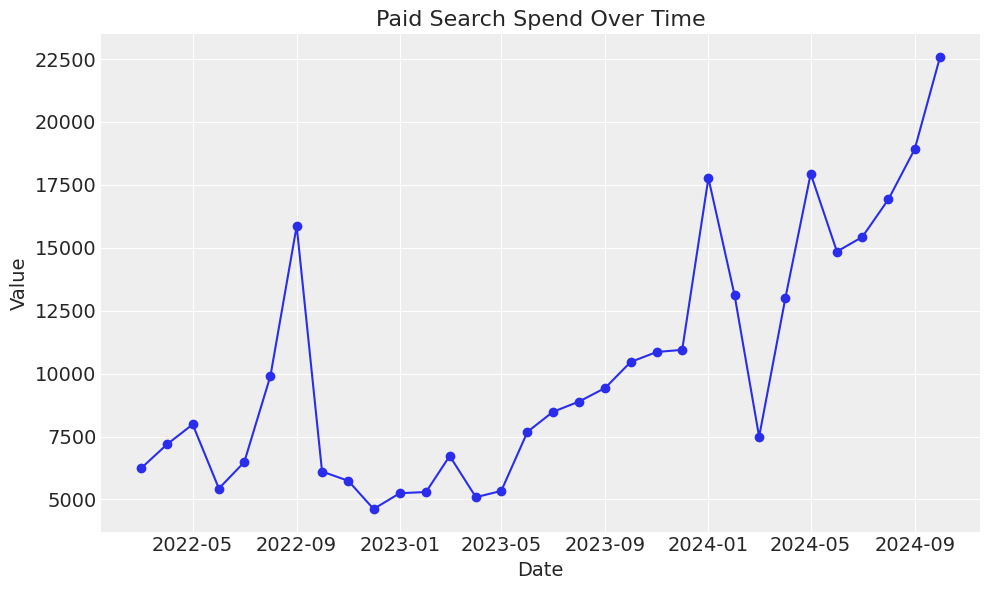

In [104]:

import matplotlib.pyplot as plt

df_series = df_final2.reset_index()

# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(df_series['year_month'], df_series['SPEND'], marker='o')

# Customize the plot
plt.title('Paid Search Spend Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

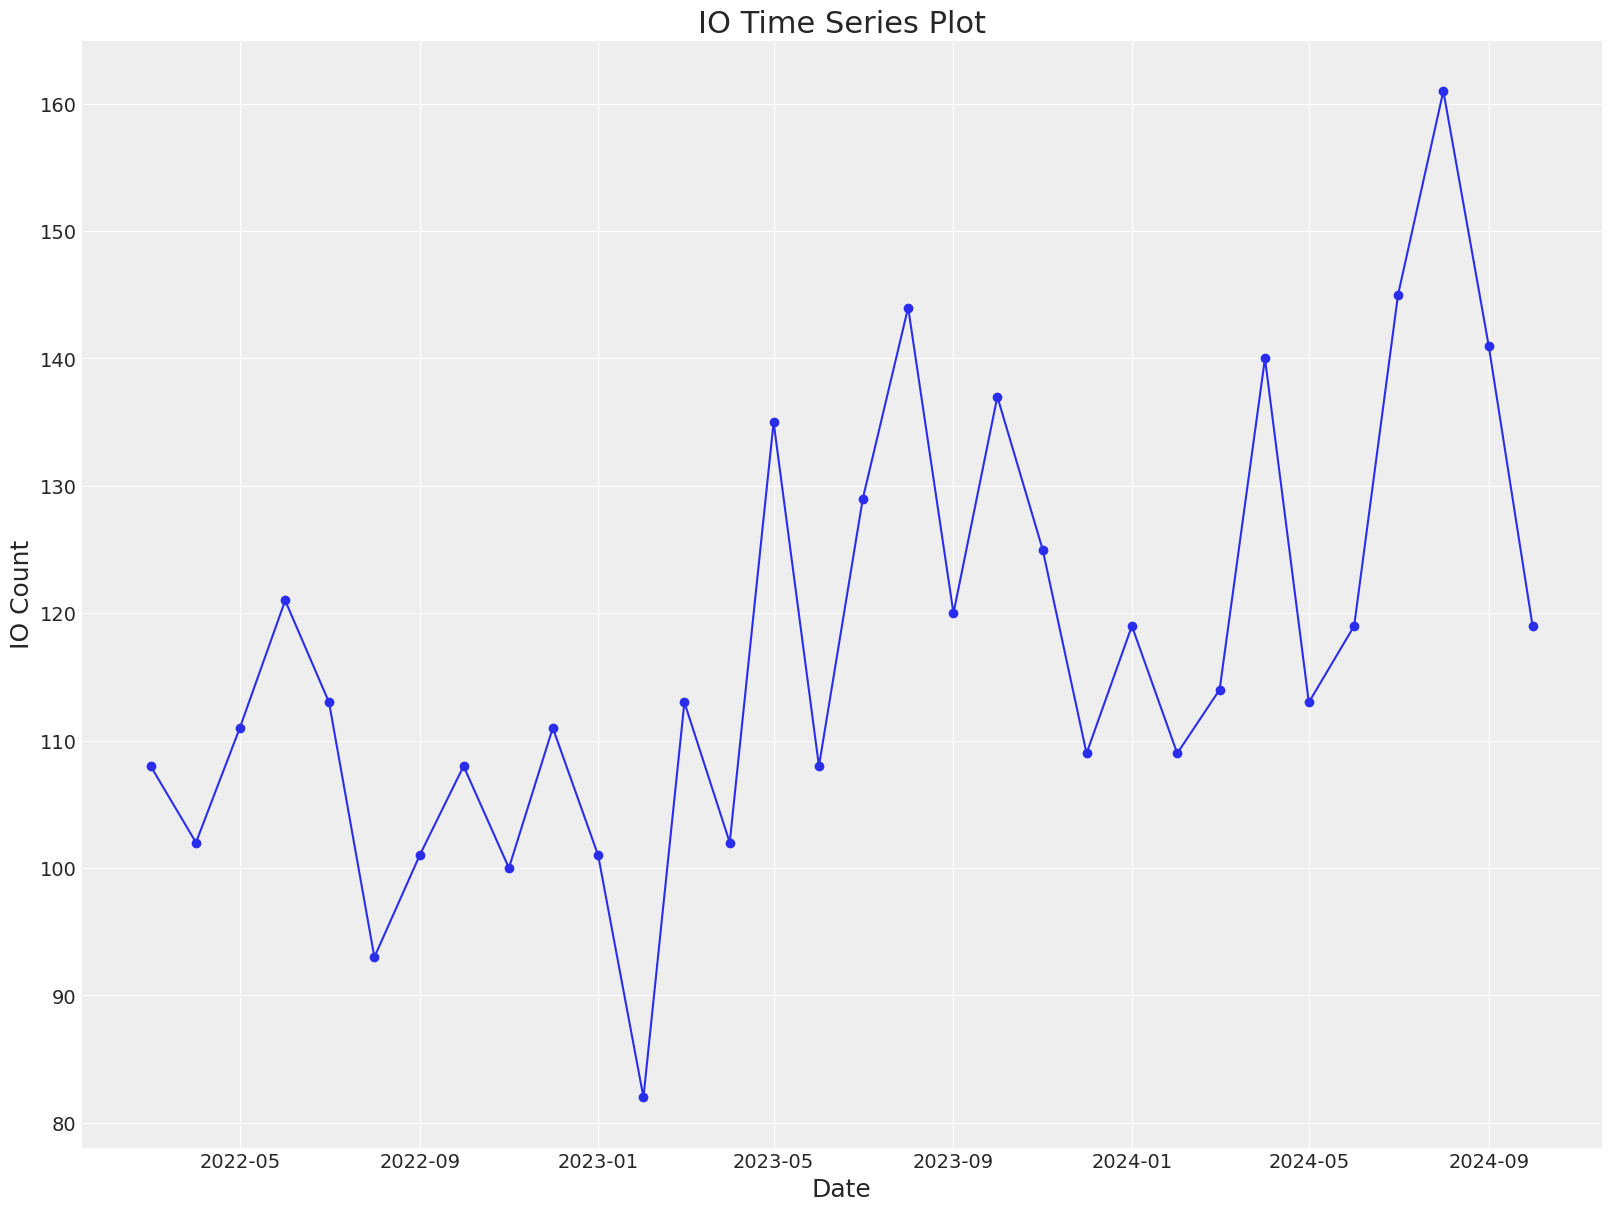

In [105]:
# Plot time series
#plt.plot(df_series['io_count'])


plt.figure(figsize=(16, 12))
plt.plot(df_series['year_month'], df_series['io_count'], marker='o')
plt.title('IO Time Series Plot', fontsize = 22)
plt.xlabel('Date', fontsize=18)
plt.ylabel('IO Count', fontsize=18)
plt.grid(True)
plt.show()

In [106]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df_series['io_count'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF Statistic: -3.3040706117624286
p-value: 0.0146974956632388


/var/folders/sb/n8yqrs6n7y9ghs7jf_2n7h280000gp/T/ipykernel_16236/2057782474.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 1000x600 with 0 Axes>

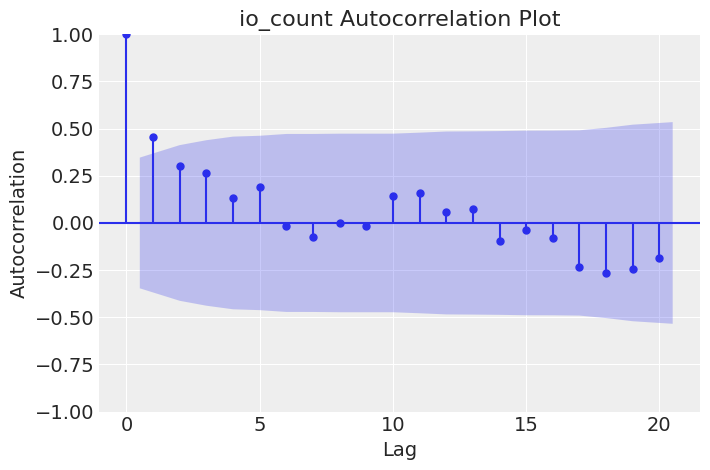

In [107]:
from statsmodels.graphics.tsaplots import plot_acf
# Plot autocorrelation
plt.figure(figsize=(10, 6))
plot_acf(df_series['io_count'], lags=20)  # Specify number of lags
plt.title('io_count Autocorrelation Plot', fontsize=16)
plt.xlabel('Lag', fontsize=14)
plt.ylabel('Autocorrelation', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

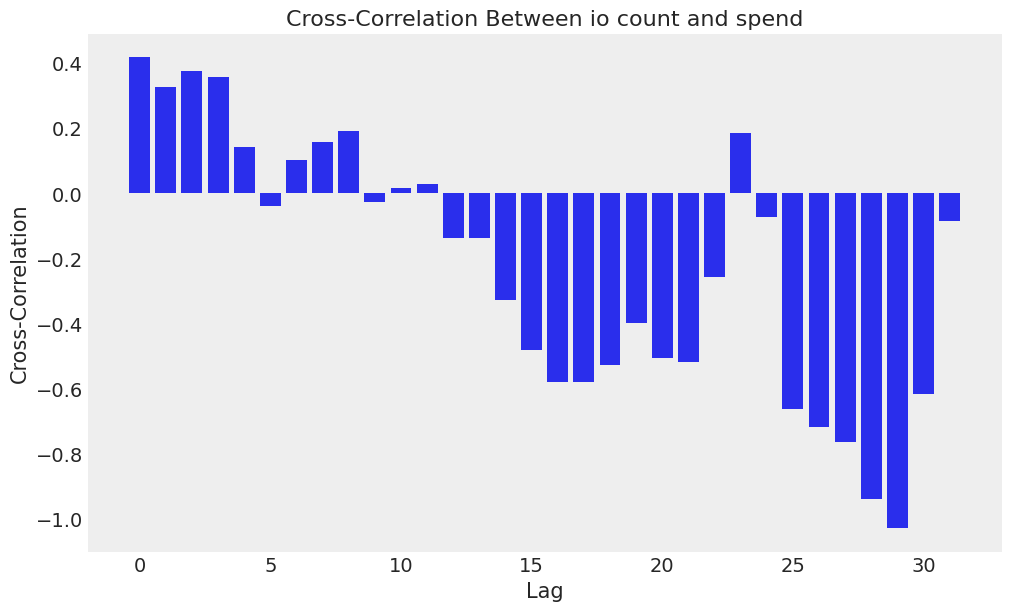

In [108]:
from statsmodels.tsa.stattools import ccf

# Compute cross-correlation between two features
cross_corr = ccf(df_series['io_count'], df_series['SPEND'])

# Plot the cross-correlation
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.bar(range(len(cross_corr)), cross_corr)
plt.title('Cross-Correlation Between io count and spend')
plt.xlabel('Lag')
plt.ylabel('Cross-Correlation')
plt.grid()
plt.show()

In [109]:
#adding lags
df_final2.head()

,io_count,intervention,t,month,direct_search_sum,SPEND,IMPRESSIONS,CLICKS
year_month,,,,,,,,
2022-03-01,108,False,9,3,3264,6239.42,8859,2059
2022-04-01,102,False,10,4,2716,7198.64,8942,2091
2022-05-01,111,False,11,5,2290,7981.32,8244,1900
2022-06-01,121,False,12,6,3770,5433.70,7898,1864
2022-07-01,113,False,13,7,83132,6483.18,7360,1860


In [110]:
k = 1
df_final3 = df_final2.copy()
df_final3['lag_SPEND'] = df_final3['SPEND'].shift(k)
df_final3['lag_direct_search_sum'] = df_final3['direct_search_sum'].shift(k)
df_final3['lag_IMPRESSIONS'] = df_final3['IMPRESSIONS'].shift(k)
df_final3['lag_io_count'] = df_final3['io_count'].shift(k)
df_final3 = df_final3.dropna()
df_final3.head()

,io_count,intervention,t,month,direct_search_sum,SPEND,IMPRESSIONS,CLICKS,lag_SPEND,lag_direct_search_sum,lag_IMPRESSIONS,lag_io_count
year_month,,,,,,,,,,,,
2022-04-01,102,False,10,4,2716,7198.64,8942,2091,6239.42,3264.0,8859.0,108.0
2022-05-01,111,False,11,5,2290,7981.32,8244,1900,7198.64,2716.0,8942.0,102.0
2022-06-01,121,False,12,6,3770,5433.70,7898,1864,7981.32,2290.0,8244.0,111.0
2022-07-01,113,False,13,7,83132,6483.18,7360,1860,5433.70,3770.0,7898.0,121.0
2022-08-01,93,False,14,8,133221,9912.21,7651,1941,6483.18,83132.0,7360.0,113.0


In [111]:
df_final3.tail()

,io_count,intervention,t,month,direct_search_sum,SPEND,IMPRESSIONS,CLICKS,lag_SPEND,lag_direct_search_sum,lag_IMPRESSIONS,lag_io_count
year_month,,,,,,,,,,,,
2024-06-01,119,False,36,6,135255,14850.53,5820,2132,17942.74,148317.0,5906.0,113.0
2024-07-01,145,False,37,7,132761,15427.24,5246,2025,14850.53,135255.0,5820.0,119.0
2024-08-01,161,True,38,8,138437,16929.15,4749,1986,15427.24,132761.0,5246.0,145.0
2024-09-01,141,True,39,9,165727,18918.25,5633,2668,16929.15,138437.0,4749.0,161.0
2024-10-01,119,True,40,10,137832,22583.98,5427,2327,18918.25,165727.0,5633.0,141.0


In [112]:
seed=42
result4 = cp.InterruptedTimeSeries(
    data=df_final3,
    treatment_time=pd.Timestamp(intervention_date),
    formula="io_count ~ 1 + t + C(month) + direct_search_sum + SPEND + IMPRESSIONS + \
         + lag_io_count",
    model=cp.pymc_models.LinearRegression(sample_kwargs={"random_seed": seed}),
)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta, sigma]


/Users/lmola/.pyenv/versions/3.11.7/lib/python3.11/site-packages/rich/live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 10 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
Sampling: [beta, sigma, y_hat]
Sampling: [y_hat]
Sampling: [y_hat]
Sampling: [y_hat]
Sampling: [y_hat]


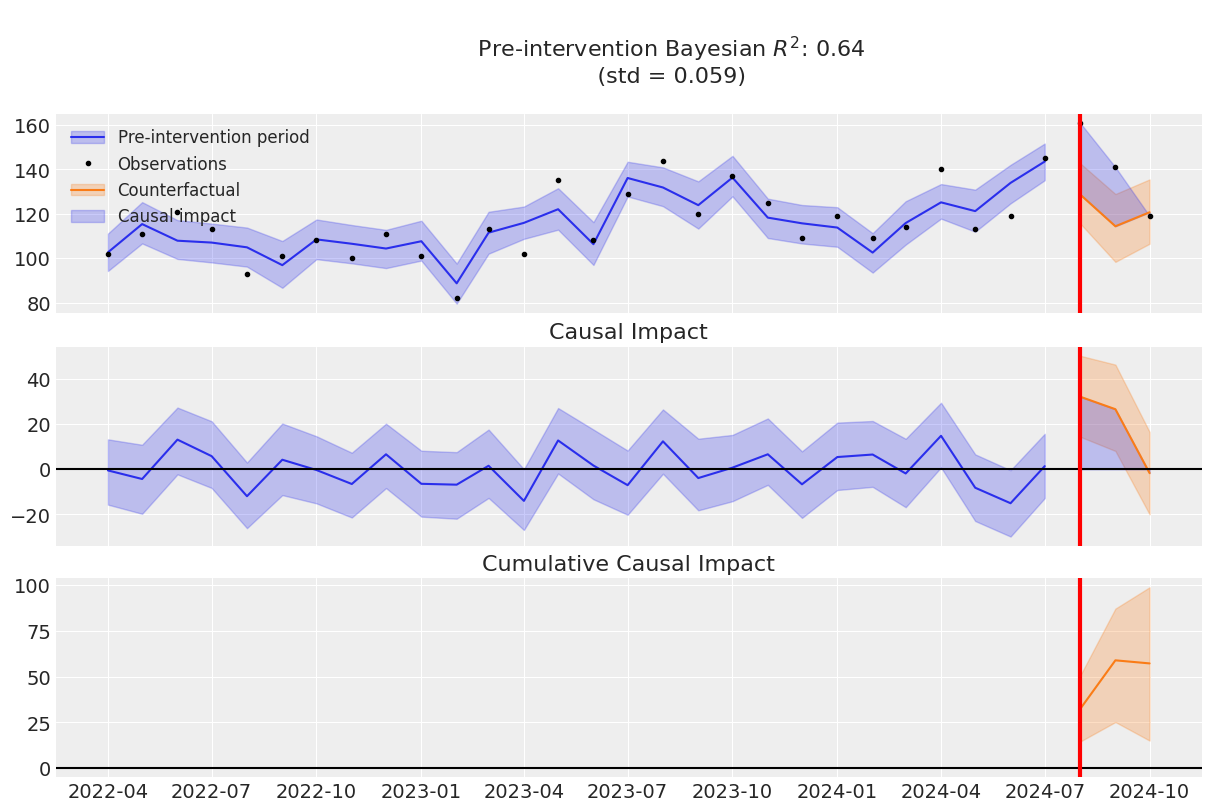

In [113]:
fig4, ax = result4.plot()

# Adjust the figure size
fig4.set_size_inches(12, 8)  # Example: Width = 12 inches, Height = 8 inches

Causal Graph for New York saved as New York_plot.png


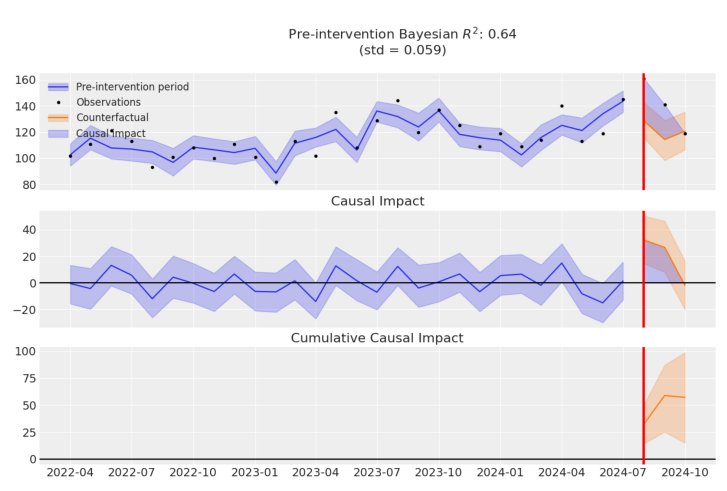

In [114]:
import matplotlib.image as mpimg



fig4.savefig(f"{MSA_MARKET}_plot.png")
plt.close()  # Close the figure to avoid overwriting
print(f"Causal Graph for {MSA_MARKET} saved as {MSA_MARKET}_plot.png")
plt.axis('off')  # Turn off axes for better visualization
img = mpimg.imread(f"{MSA_MARKET}_plot.png")#
plt.imshow(img)

In [115]:
# List all attributes and methods of the model object
print(dir(result4))

['__annotations__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_x_design_info', '_y_design_info', 'bayesian_plot', 'datapost', 'datapre', 'expt_type', 'formula', 'idata', 'input_validation', 'labels', 'model', 'ols_plot', 'outcome_variable_name', 'plot', 'post_X', 'post_impact', 'post_impact_cumulative', 'post_pred', 'post_y', 'pre_X', 'pre_impact', 'pre_pred', 'pre_y', 'print_coefficients', 'score', 'summary', 'supports_bayes', 'supports_ols', 'treatment_time']


In [116]:
pre_pred_samples = result4.pre_pred.posterior_predictive["y_hat"]
print(pre_pred_samples)  # Check the structure

<xarray.DataArray 'y_hat' (chain: 4, draw: 1000, obs_ind: 28)> Size: 896kB
array([[[108.24727425, 121.25149063, 104.40726766, ..., 119.9059474 ,
         131.1332332 , 144.8914837 ],
        [ 93.88993052, 114.51733583, 104.14188103, ..., 111.46107556,
         149.68111092, 142.75648123],
        [107.26012779, 133.6989698 , 105.28560691, ..., 128.58800798,
         121.51358269, 136.89556973],
        ...,
        [105.44473098, 127.678608  , 126.95150008, ..., 125.29602105,
         147.37661166, 141.94337195],
        [103.77961359, 117.36716796, 111.36846193, ..., 113.3116643 ,
         136.94540442, 137.76502845],
        [109.95605446, 121.25142785, 111.02999284, ..., 120.27155281,
         146.91137028, 139.89364429]],

       [[111.85849291, 132.65602094, 105.88477382, ..., 122.3853598 ,
         127.34692372, 148.30238102],
        [ 94.73704617, 111.95868902, 108.06677334, ..., 119.83615123,
         144.44386239, 148.93019059],
        [105.35095996, 122.53460985, 120.96758

In [117]:
# Compute the mean prediction across posterior samples
pre_pred_mean = pre_pred_samples.mean(dim="draw")
pre_pred_mean


<xarray.DataArray 'y_hat' (chain: 4, obs_ind: 28)> Size: 896B
array([[102.28340239, 115.35393949, 107.81899513, 107.45186775,
        104.98827252,  96.61657123, 108.66897371, 105.94622793,
        104.56374526, 107.67079477,  88.57145026, 111.21149242,
        115.73812485, 121.77643188, 105.84065894, 135.62334408,
        131.64000188, 123.76758569, 135.88985054, 118.32614914,
        115.66386605, 113.70649338, 102.13402609, 115.96683346,
        125.40374588, 120.93117274, 133.93382237, 143.44072052],
       [102.92680431, 115.03311557, 107.61073655, 107.47754814,
        105.08694445,  96.79886364, 108.16377798, 106.61902122,
        104.17862146, 107.48042358,  89.12792838, 111.62362387,
        116.23914026, 122.16697648, 106.92019229, 136.11921721,
        131.53761194, 123.23634543, 136.02434842, 118.42402312,
        115.65306261, 113.6907047 , 102.76980291, 115.82772124,
        124.91604938, 121.65187066, 133.75172328, 143.81984432],
       [102.50314779, 115.53163721, 107.88207913, 106.75968769,
        105.23431758,  96.78327437, 108.28815036, 106.77401855,
        104.43499778, 107.26508736,  88.50806842, 111.52220252,
        115.83525867, 122.46267655, 106.27775393, 136.23756514,
        131.5175264 , 124.38356536, 136.95703813, 118.25428471,
        115.70817124, 113.49531918, 102.32210215, 115.5432201 ,
        125.04920792, 120.83965532, 134.26512445, 143.6373623 ],
       [102.23781093, 115.26479163, 108.00619894, 106.96088886,
        104.42368989,  96.79220719, 108.151441  , 106.71896581,
        104.16471416, 107.29559046,  89.02990819, 111.32957581,
        116.22964593, 122.36460445, 106.24492486, 136.14218763,
        131.63914458, 124.1175579 , 136.18248653, 118.32053659,
        115.55130804, 113.32583943, 102.52526025, 116.0342366 ,
        125.14913667, 121.27473299, 134.23232631, 143.50092983]])
Coordinates:
  * chain    (chain) int64 32B 0 1 2 3
  * obs_ind  (obs_ind) int64 224B 0 1 2 3 4 5 6 7 8 ... 20 21 22 23 24 25 26 27

In [118]:
import arviz as az

az.summary(result4.post_impact.max("obs_ind"))
az.summary(result4.pre_pred.posterior_predictive["y_hat"].mean("obs_ind"))

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
y_hat,115.119,1.644,111.883,118.086,0.026,0.019,3907.0,3540.0,1.0


In [119]:
az.summary(result4.post_impact.max("obs_ind"))

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
x,34.331,8.876,17.639,50.576,0.191,0.135,2153.0,2725.0,1.0


In [120]:
# get index of the final time point
index_4 = result4.post_impact_cumulative.obs_ind.max()
# grab the posterior distribution of the cumulative impact at this final time point
last_cumulative_estimate_4 = result4.post_impact_cumulative.sel({"obs_ind": index_4})
# get summary stats
az.summary(last_cumulative_estimate_4, hdi_prob=0.9)

,mean,sd,hdi_5%,hdi_95%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
x,57.213,22.262,22.402,95.257,0.504,0.356,1955.0,2732.0,1.0


In [121]:
from scipy.stats import norm

# Inputs
estimate = 56.046
lower_ci = 19.697
upper_ci = 93.348
z_critical = 1.645  # For a 90% confidence interval

# Calculate standard error
se = (upper_ci - lower_ci) / (2 * z_critical)

# Calculate z-score
z_score = estimate / se

# Calculate p-value
p_value = 2 * norm.sf(abs(z_score))
print(f"p-value: {p_value:.4f}")

p-value: 0.0123


In [122]:
# # get index of the final time point
# index_4 = result4.post_impact_cumulative.obs_ind.max()
# # grab the posterior distribution of the cumulative impact at this final time point
# last_cumulative_estimate_4 = result4.post_impact_cumulative.sel({"obs_ind": index_4})
# # get summary stats
# az.summary(last_cumulative_estimate_4, hdi_prob=0.9)

In [123]:
df_series.tail()

,year_month,io_count,intervention,t,month,direct_search_sum,SPEND,IMPRESSIONS,CLICKS
27,2024-06-01,119,False,36,6,135255,14850.53,5820,2132
28,2024-07-01,145,False,37,7,132761,15427.24,5246,2025
29,2024-08-01,161,True,38,8,138437,16929.15,4749,1986
30,2024-09-01,141,True,39,9,165727,18918.25,5633,2668
31,2024-10-01,119,True,40,10,137832,22583.98,5427,2327


In [124]:
#number of intervention periods
int_periods = df_series['intervention'].sum()

#rows with intervention
intervention_df = df_series.tail(int_periods)

int_dates = intervention_df[['year_month', 'io_count']].reset_index(drop=True)
int_dates['treatment_region'] = MSA_MARKET
# Add a column with the index number
int_dates['Index_Number'] = int_dates.index

int_dates.head()

,year_month,io_count,treatment_region,Index_Number
0,2024-08-01,161,New York,0
1,2024-09-01,141,New York,1
2,2024-10-01,119,New York,2


In [125]:
int_dates.iloc[0][0]

/var/folders/sb/n8yqrs6n7y9ghs7jf_2n7h280000gp/T/ipykernel_16236/3285902388.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  int_dates.iloc[0][0]


Timestamp('2024-08-01 00:00:00')

In [137]:
for i in range(int_periods):
    if i ==0:
        az_df = pd.DataFrame(az.summary(result4.post_impact.sel({"obs_ind": i}), hdi_prob=0.9))
    else:

        # Concatenate the row to the DataFrame
        #df = pd.concat([df, new_row], ignore_index=True)
        new_row = pd.DataFrame(az.summary(result4.post_impact.sel({"obs_ind": i}), hdi_prob = 0.9))
        az_df = pd.concat([az_df, new_row], ignore_index=True)
        #az_df.concat(pd.DataFrame(az.summary(result4.post_impact.sel({"obs_ind": i}))))

az_df['Index_Number'] = az_df.index
az_df['bayes_Stat_Sig'] = (~((az_df['hdi_5%'] < 0 )| (az_df['hdi_95%'] < 0)))
az_df.head()

az_join = pd.merge(int_dates, az_df, on = 'Index_Number', how = 'inner')
az_join['counter_io_count'] = az_join['io_count'] - az_join['mean']
az_join['perc_lift'] = round((az_join['io_count'] - az_join['counter_io_count'])/az_join['counter_io_count'], 4)

az_final = az_join[['Index_Number', 'year_month', 'treatment_region', 'io_count', \
    'counter_io_count', 'mean', 'sd','perc_lift', 'bayes_Stat_Sig', 'hdi_5%', 'hdi_95%','mcse_mean', 'mcse_sd' ]]

az_final =az_final.rename(columns = {'mean': 'bayes_uplift'})
az_final.head()


,Index_Number,year_month,treatment_region,io_count,counter_io_count,bayes_uplift,sd,perc_lift,bayes_Stat_Sig,hdi_5%,hdi_95%,mcse_mean,mcse_sd
0,0,2024-08-01,New York,161,128.768,32.232,9.555,0.2503,True,16.459,47.950,0.191,0.135
1,1,2024-09-01,New York,141,114.334,26.666,10.150,0.2332,True,8.770,42.152,0.217,0.153
2,2,2024-10-01,New York,119,120.685,-1.685,9.768,-0.0140,False,-17.443,14.365,0.178,0.126


In [127]:
# Save with the index column
az_final.to_csv(f"{MSA_MARKET}_monthly_uplift.csv", index=True)

In [128]:
# get index of the final time point
index_4 = result4.post_impact_cumulative.obs_ind.max()
# grab the posterior distribution of the cumulative impact at this final time point
last_cumulative_estimate_4 = result4.post_impact_cumulative.sel({"obs_ind": index_4})
# get summary stats
az.summary(last_cumulative_estimate_4, hdi_prob=0.9)

az_cumulative = az.summary(last_cumulative_estimate_4, hdi_prob=0.9)

In [129]:
int_dates

,year_month,io_count,treatment_region,Index_Number
0,2024-08-01,161,New York,0
1,2024-09-01,141,New York,1
2,2024-10-01,119,New York,2


In [130]:
result = int_dates.agg(
    treatment_start = ("year_month", "min"),
    treatment_end = ("year_month", "max"),
    io_sum = ("io_count", "sum")
).reset_index()

In [131]:
result

,index,year_month,io_count
0,treatment_start,2024-08-01,NaN
1,treatment_end,2024-10-01,NaN
2,io_sum,NaT,421.0


In [132]:
int_dates['io_count'].sum()

421

In [133]:
az_cumulative.head()

,mean,sd,hdi_5%,hdi_95%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
x,57.213,22.262,22.402,95.257,0.504,0.356,1955.0,2732.0,1.0


In [134]:
#adjust the cumulative table

#az_cumulative['Index_Number'] = az_df.index
az_cumulative['bayes_Stat_Sig'] = (~((az_cumulative['hdi_5%'] < 0 )| (az_cumulative['hdi_95%'] < 0)))
#az_cumulative.head()
az_cumulative['io_sum'] = int_dates['io_count'].sum()
az_cumulative['counter_io_sum'] = az_final['counter_io_count'].sum()
az_cumulative['treatment_region'] = MSA_MARKET
az_cumulative['treatment_start'] = int_dates['year_month'].min()
az_cumulative['treatment_end'] = int_dates['year_month'].max()
#az_cumulative_join = pd.merge(az_cumulative_final, az_cumulative, on = 'Index_Number', how = 'inner')

#az_cumulative['counter_io_count'] = az_cumulative_join['io_count'] - az_join['mean']
az_cumulative['perc_lift'] = round((az_cumulative['io_sum'] - \
    az_cumulative['counter_io_sum'])/az_cumulative['counter_io_sum'], 4)

az_cumulative_final = az_cumulative[['treatment_region', 'treatment_start', 'treatment_end', \
    'io_sum', 'counter_io_sum', 'mean', 'sd','perc_lift', 'bayes_Stat_Sig', 'hdi_5%', 'hdi_95%','mcse_mean', 'mcse_sd' ]]

az_cumulative_final =az_cumulative_final.rename(columns = {'mean': 'bayes_uplift'})
az_cumulative_final.head()

,treatment_region,treatment_start,treatment_end,io_sum,counter_io_sum,bayes_uplift,sd,perc_lift,bayes_Stat_Sig,hdi_5%,hdi_95%,mcse_mean,mcse_sd
x,New York,2024-08-01,2024-10-01,421,363.787,57.213,22.262,0.1573,True,22.402,95.257,0.504,0.356


In [135]:
# Save with the index column
az_cumulative_final.to_csv(f"{MSA_MARKET}_cumulative_uplift.csv", index=True)